# Prétraitements élémentaires sur les images

In [9]:
# Importer les modules nécessaires
import cv2
import matplotlib.pyplot as plt
import skimage as ski

### <span style=color:green> Lecture et Propriétés d'images</span>

In [10]:
# Lire l'image couleur ball
ball_bgr = cv2.imread("Images/ball.jpg", cv2.IMREAD_COLOR) # image en espace de couleur BGR

# Afficher le type de l'image ball
print(type(ball_bgr))

# Afficher le type de valeur des pixels
print(type(ball_bgr[0,0,1])) 

# Afficher les valeurs BGR du pixel (50,60)
print(ball_bgr[50,60])

# Afficher uniquement la valeur du vert
print(ball_bgr[50,50,2])

# Afficher sa Définition et le nombre de canaux (3 ici pour RGB)
print(f"hauteur, largeur, canaux : {ball_bgr.shape}")

# Calculer sa taille en Mo = Définition (en pixels) * profondeur (en bits par pixel)
hauteur = ball_bgr.shape[0] 
largeur = ball_bgr.shape[1]
profondeur = 24  # 3 canaux RGB pour 8 bits/pixels
taille_mo = (hauteur * largeur * profondeur) / (8*1024*1024) # conversion en Octets puis en Mo
print(f"La taille de l'image est : {taille_mo:.3f} Mo")


<class 'numpy.ndarray'>
<class 'numpy.uint8'>
[  2 200 134]
179
hauteur, largeur, canaux : (427, 640, 3)
La taille de l'image est : 0.782 Mo


### <span style=color:green> Changement d'espace de couleurs <span> 

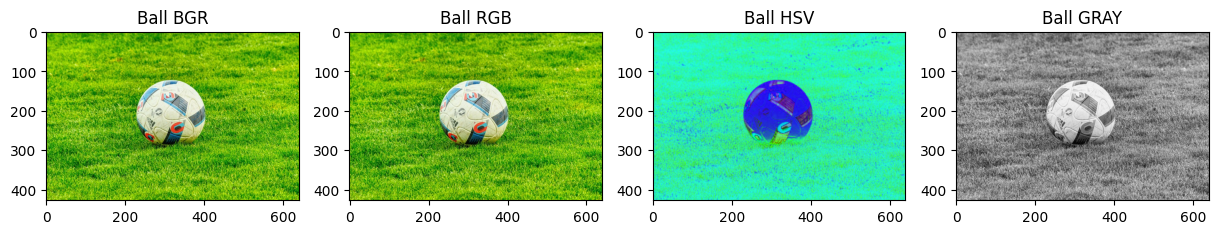

In [11]:
# Il existe une varité de façons proposées par OpenCV
ball_rgb = cv2.cvtColor(ball_bgr, cv2.COLOR_BGR2RGB) # Espace RGB initial
ball_hsv = cv2.cvtColor(ball_bgr, cv2.COLOR_BGR2HSV) # Espace HSV
ball_gray = cv2.cvtColor(ball_bgr, cv2.COLOR_BGR2GRAY) # Espace YUV

# Afficher les différents espaces
plt.figure(figsize=[15,15]) # fenêtre d'affichage de hauteur et largeur = 15 pouces
plt.subplot(141); plt.imshow(ball_bgr[:,:,::-1]); plt.title("Ball BGR")
plt.subplot(142); plt.imshow(ball_rgb); plt.title("Ball RGB")
plt.subplot(143); plt.imshow(ball_hsv); plt.title("Ball HSV")
plt.subplot(144); plt.imshow(ball_gray, cmap='gray'); plt.title("Ball GRAY")
plt.show()

### <span style=color:green> Changement de définition (size) </span>

In [ ]:
# En précisant les nouvelles valeurs de la hauteur et la largeur
nouv_hauteur = 1080
nouv_largeur = 720
ball_bgr_prec = cv2.resize(ball_bgr, dsize=(nouv_largeur, nouv_hauteur), interpolation = cv2.INTER_LINEAR)

# En maintenant l'aspect ratio



### <span style=color:green> Changement Géométrique </span>

On peut utiliser la fonction rotate de skimage pour faire pivoter l'image rapidement.

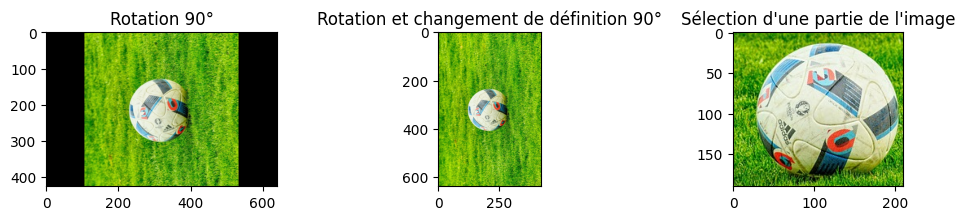

In [17]:
# Faire pivoter l'image d'un angle quelconque autour de son centre
ball_bgr_rotate1 = ski.transform.rotate(ball_bgr, angle=90, resize=False, center=None)
ball_bgr_rotate2 = ski.transform.rotate(ball_bgr, angle=90, resize=True, center=None) # resize = True

# Sélectionner une partie de l'image, ici sle ballon centre
ball_bgr_centre = ball_bgr[110:300, 200:410]

# Afficher les transformations
plt.figure(figsize=[12,2])
plt.subplot(131); plt.imshow(ball_bgr_rotate1[:,:,::-1]); plt.title("Rotation 90°")
plt.subplot(132); plt.imshow(ball_bgr_rotate2[:,:,::-1]); plt.title("Rotation et changement de définition 90°")
plt.subplot(133); plt.imshow(ball_bgr_centre[:,:,::-1]); plt.title("Sélection d'une partie de l'image")
plt.show()